# This notebook is dedicated to the Exploratory Data Analysis of Research Project

### Load Required Packages

In [1]:
# loading required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Supportive Functions

In [2]:
# supportive functions
def dataset_dimension(name: str, dataset: pd.DataFrame):
    print(f"{name} dataset dimension: {dataset.shape}")

def get_null_count_df(dataset: pd.DataFrame) -> pd.DataFrame:
    null_counts = dataset.isnull().sum()
    null_df = null_counts.reset_index()
    null_df.columns = ["feature", "count"]
    return null_df

def get_null_value_summary(df: pd.DataFrame) -> pd.DataFrame:
    null_counts = get_null_count_df(df)
    null_counts["missing_percentage"] = (null_counts["count"] / len(df)) * 100
    return null_counts

def get_null_values_by_threshold_range(df: pd.DataFrame, lower_bound: float, upper_bound:float) -> pd.DataFrame:
    null_summary = get_null_value_summary(df)
    filtered_nulls = null_summary[
        (null_summary["missing_percentage"] > lower_bound) &
        (null_summary["missing_percentage"] <= upper_bound)
    ]

    return filtered_nulls

In [4]:
# data visualization functions
def show_bar_plot(data: pd.DataFrame, x_label: str, y_label:str, title, hue, figure_size=(12,6), color_palette="pastel"):
    plt.figure(figsize=figure_size)
    plt.title(title)
    sns.barplot(data=data, x=x_label, y=y_label, hue=hue, palette=color_palette)
    plt.show()

def show_histogram(
    data: pd.DataFrame,
    column: str,
    title: str = "",
    bins: int = 20,
    hue: str = None,
    figure_size=(12, 6),
    color_palette="pastel"
):
    plt.figure(figsize=figure_size)
    plt.title(title)
    sns.histplot(
        data=data,
        x=column,
        hue=hue,
        bins=bins,
        palette=color_palette,
        kde=True
    )
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()



def show_boxplot(data, column, title="", figure_size=(8, 5), color="skyblue", horizontal=False):

    plt.figure(figsize=figure_size)
    plt.title(title)
    if horizontal:
        sns.boxplot(x=data[column], color=color)
        plt.xlabel(column)
    else:
        sns.boxplot(y=data[column], color=color)
        plt.ylabel(column)
    plt.show()




## 1. Load Datasets

In [24]:
# load  (original) datasets
data_path = "data/"
train_identity = pd.read_csv(data_path + "train_identity.csv")
train_transaction = pd.read_csv(data_path + "train_transaction.csv")
test_identity = pd.read_csv(data_path + "test_identity.csv")
test_transaction = pd.read_csv(data_path + "test_transaction.csv")

## 2. Understanding the Data
### 2.1 Dataset Dimensions

In [26]:
# view each dataset dimension
dataset_dimension("Identity (train)", train_identity)
dataset_dimension("Transaction (train)", train_transaction)
dataset_dimension("Identity (test)", test_identity)
dataset_dimension("Transaction (test)", test_transaction)

Identity (train) dataset dimension: (144233, 41)
Transaction (train) dataset dimension: (590540, 394)
Identity (test) dataset dimension: (141907, 41)
Transaction (test) dataset dimension: (506691, 393)


## 2.2 First Few Records of Each Dataset

In [27]:
print("Train identity dataset:")
train_identity.head()


Train identity dataset:


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [28]:
print("Train transaction dataset:")
train_transaction.head()

Train transaction dataset:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
print("Test identity dataset:")
test_identity.head()

Test identity dataset:


,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [30]:
print("Test transaction dataset:")
test_transaction.head()

Test transaction dataset:


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note:** By inspecting the first few records of each dataset, we can observe that the identity datasets contain various identity-related features, while the transaction datasets include transaction-specific details along with the target variable isFraud in the training set. Neither test dataset will play an important role in the model-building and validation stage, since the test_transaction dataset did not contain the target variable of isFraud.
Since there are two segments of data available as identity and transaction, better to merge them together to do further analysis on the data.
Below defines the merged dataframes. **transaction_data** contains the both _train_identity_ and _train_transaction_ data joined by **TransactionID**.
Similarly, _test_identity_ and _test_transaction_ datasets are merged by **TransactionID** as **unseen_transaction_data**.

In [27]:
# merging train datasets
transaction_data = pd.merge(train_identity, train_transaction, on="TransactionID", how="right") # right mapping is used to retain all transaction records
dataset_dimension("Merged Train Transaction Data", transaction_data)

Merged Train Transaction Data dataset dimension: (590540, 434)


In [28]:
transaction_data.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# merging test datasets
unseen_transaction_data = pd.merge(test_identity, test_transaction, on="TransactionID", how="inner")
dataset_dimension("Merged Test Transaction Data", unseen_transaction_data)

Merged Test Transaction Data dataset dimension: (141907, 433)


### 2.3 Null Value Analysis


Transaction dataset null value analysis:


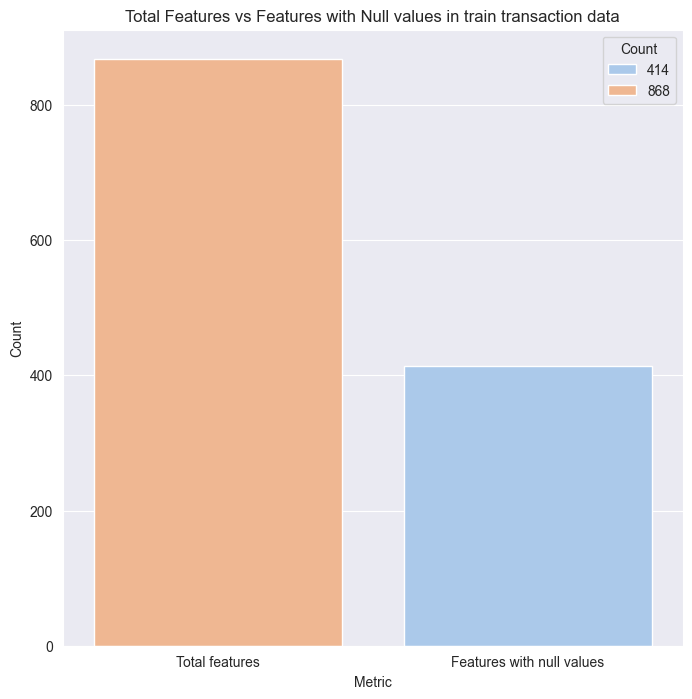

In [29]:
print("Transaction dataset null value analysis:")

transaction_data_nulls = get_null_count_df(transaction_data)

# get summary of null values
transaction_data_null_summary = pd.DataFrame({
    "Metric": ["Total features", "Features with null values"],
    "Count": [transaction_data_nulls.size, (transaction_data_nulls["count"] > 0).sum()]
})

# display summary of null values
show_bar_plot(transaction_data_null_summary , "Metric", "Count", "Total Features vs Features with Null values in train transaction data", "Count", (8, 8))


**Transaction data: features with missing values exceeding 80%**

In [30]:
# train transaction null values by percentage
null_summary_by_percentage_80 = get_null_values_by_threshold_range(transaction_data, 80, 100)
print(null_summary_by_percentage_80)
print("Number of features: ",len(null_summary_by_percentage_80))

    feature   count  missing_percentage
3     id_03  524216           88.768923
4     id_04  524216           88.768923
7     id_07  585385           99.127070
8     id_08  585385           99.127070
9     id_09  515614           87.312290
..      ...     ...                 ...
429    V335  508189           86.054967
430    V336  508189           86.054967
431    V337  508189           86.054967
432    V338  508189           86.054967
433    V339  508189           86.054967

[74 rows x 3 columns]
Number of features:  74


**Note:** Here, we can observe that there are 74 features in the training transaction dataset that have a high percentage of missing values (over 80%). **Better to drop** these features since most of them are null

**Training transaction data: features with missing values between 50% and 80%**

In [31]:
null_summary_by_percentage_50_80 = get_null_values_by_threshold_range(transaction_data, 50, 80)

print(null_summary_by_percentage_50_80)
print("Number of features: ",len(null_summary_by_percentage_50_80))

    feature   count  missing_percentage
1     id_01  446307           75.576083
2     id_02  449668           76.145223
5     id_05  453675           76.823755
6     id_06  453675           76.823755
11    id_11  449562           76.127273
..      ...     ...                 ...
368    V274  460110           77.913435
369    V275  460110           77.913435
370    V276  460110           77.913435
371    V277  460110           77.913435
372    V278  460110           77.913435

[140 rows x 3 columns]
Number of features:  140


**Note:** There **are 140 features** where 50% of their values are missing. **Better to drop** these features as well.

**Training transaction data: features with missing values less than 50%**

In [33]:
null_summary_by_percentage_below_50 = get_null_values_by_threshold_range(transaction_data, 0, 50)
print(null_summary_by_percentage_below_50)
print("Number of features: ",len(null_summary_by_percentage_below_50))

    feature  count  missing_percentage
46    card2   8933            1.512683
47    card3   1565            0.265012
48    card4   1577            0.267044
49    card5   4259            0.721204
50    card6   1571            0.266028
..      ...    ...                 ...
411    V317     12            0.002032
412    V318     12            0.002032
413    V319     12            0.002032
414    V320     12            0.002032
415    V321     12            0.002032

[200 rows x 3 columns]
Number of features:  200


**Note:** 283 features contain null values less than 50%. These values should be purified.

### 2.4 Duplicate Records Analysis
TODO

### 2.5 Univariate Analysis
#### 2.5.1 Training Transaction Data

In [34]:
# TransactionAmt
print("Transaction data - TransactionAmt description:")
transaction_data["TransactionAmt"].describe()


Transaction data - TransactionAmt description:


count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [35]:
train_transaction["TransactionAmt"].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

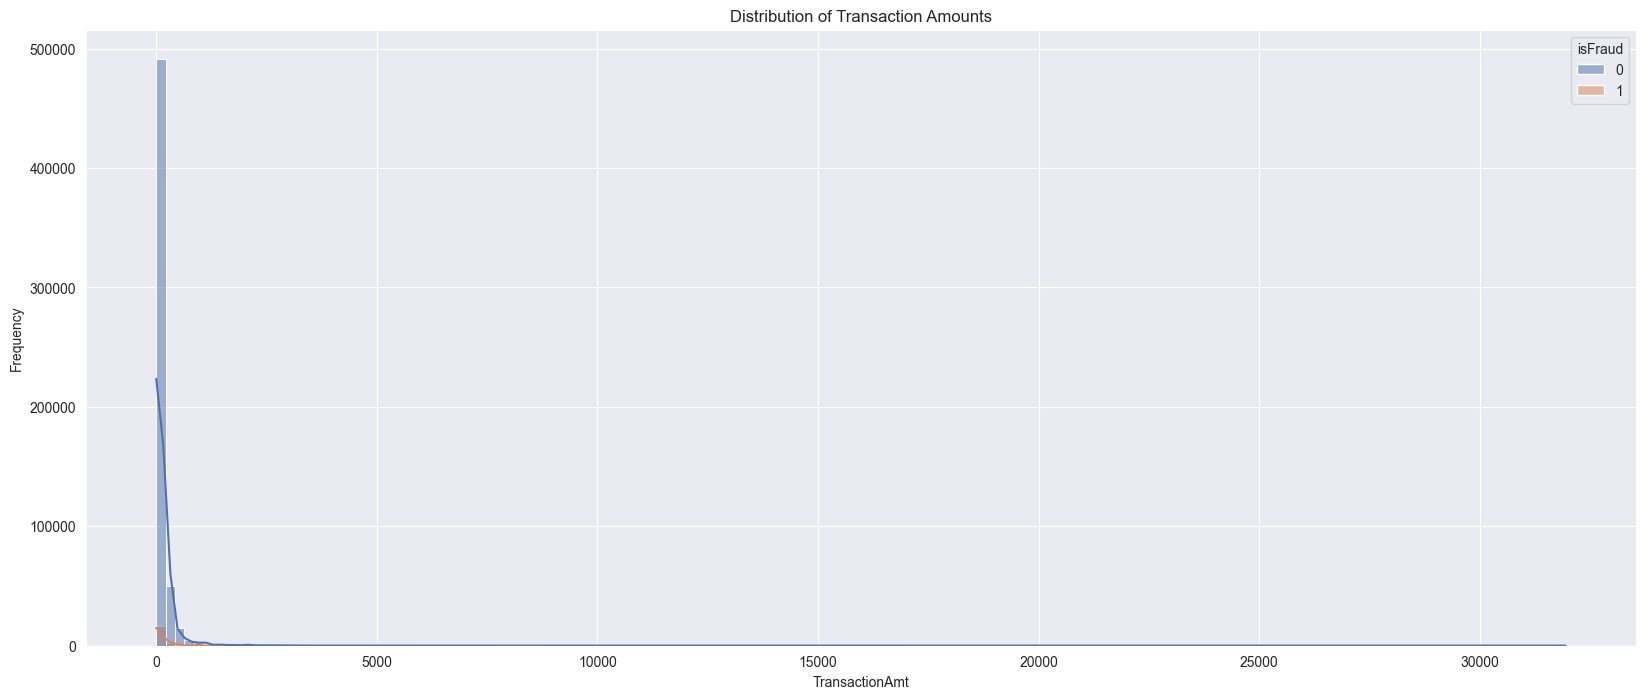

In [36]:
show_histogram(train_transaction, "TransactionAmt", "Distribution of Transaction Amounts", bins=150, hue="isFraud", color_palette="deep", figure_size=(20, 8))

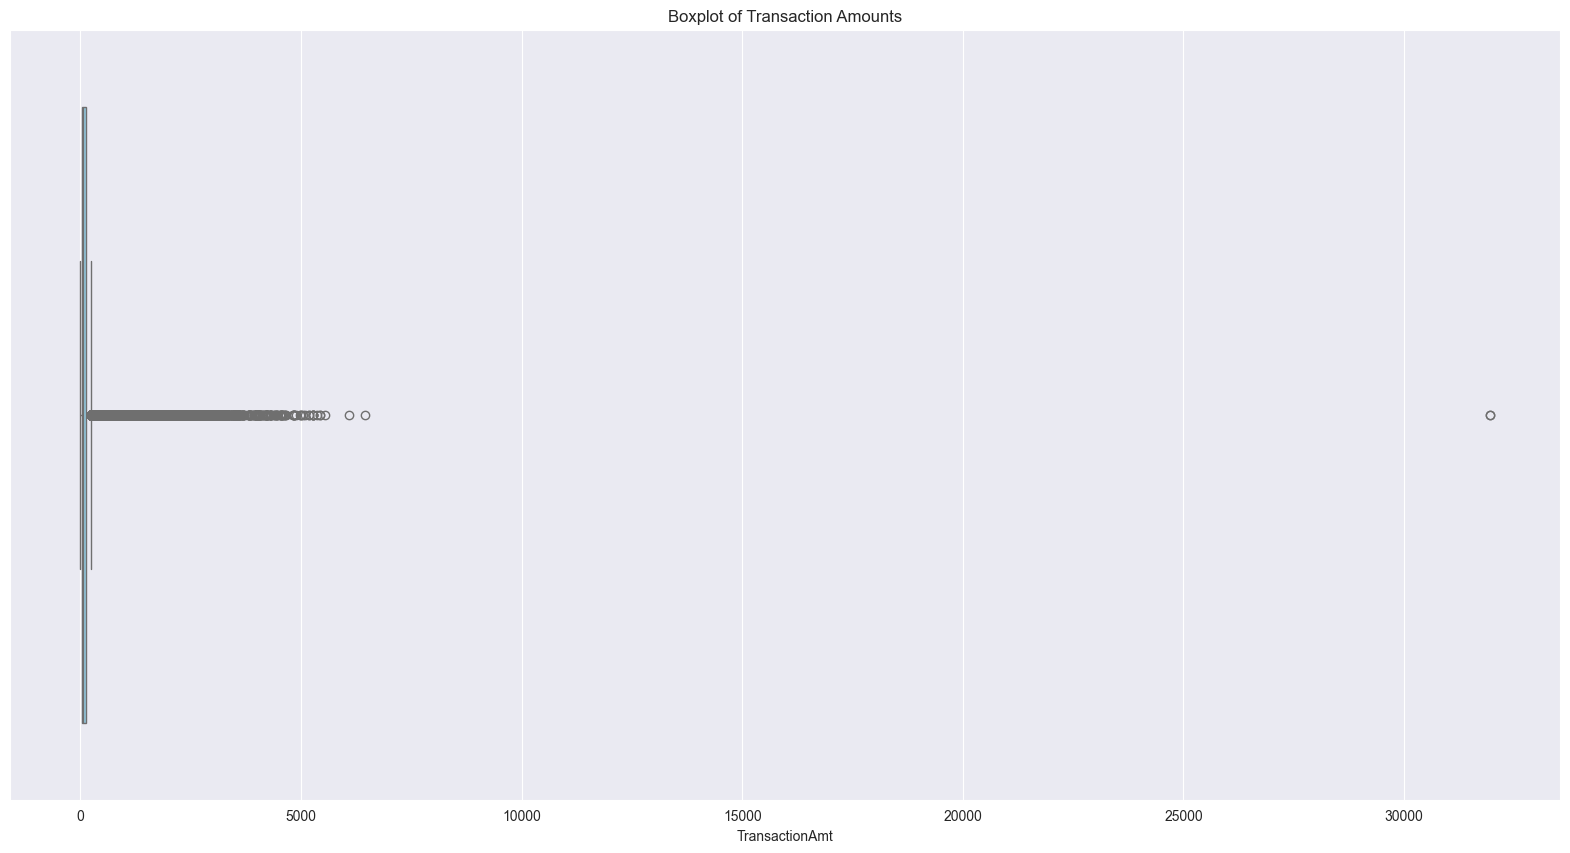

In [40]:
# outliers
show_boxplot(transaction_data, "TransactionAmt", "Boxplot of Transaction Amounts", figure_size=(20, 10), horizontal=True)